<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/Computer_Hardware_Performance_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding the Dataset:
The Computer Hardware Performance Dataset contains valuable information about different computer hardware components and their performance metrics. It includes features such as machine cycle time, main memory size, cache memory, and more. The dataset also provides a target variable, “Published Relative Performance” (PRP), which represents the published relative performance of the hardware.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
computer_hardware = fetch_ucirepo(id=29)

# data (as pandas dataframes)
X = computer_hardware.data.features
y = computer_hardware.data.targets

# metadata
print(computer_hardware.metadata)

# variable information
print(computer_hardware.variables)


{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [12]:
# Establish data (as pandas dataframe)
computer_hardware_df= computer_hardware.data.original
computer_hardware_df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [15]:
computer_hardware_df.drop_duplicates()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [17]:
computer_hardware_df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


EDA data exploratory

In [19]:
computer_hardware_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


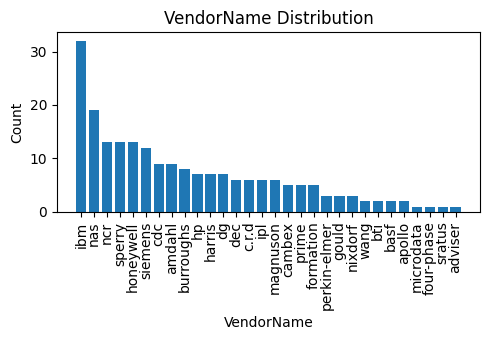

In [25]:
import matplotlib.pyplot as plt

#Explore data Features and Target

vender = computer_hardware_df['VendorName'].value_counts()

plt.figure(figsize=(5, 3.5))
plt.bar(vender.index, vender.values)
plt.title('VendorName Distribution')
plt.xlabel('VendorName')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

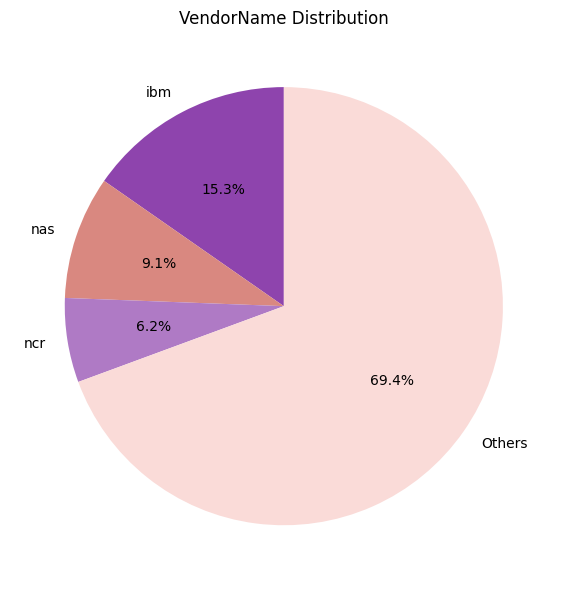

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract vendor counts
vender_counts = computer_hardware_df['VendorName'].value_counts()

# Group vendors into top 3 and others
top_venders = vender_counts[:3]
others = vender_counts[3:].sum()

# Create a new Series for 'Others'
others_series = pd.Series({'Others': others})

# Use pd.concat to combine the Series
# Use ignore_index=True to reset the index of the combined Series.
data_for_pie = pd.concat([top_venders, others_series], ignore_index=False)

# Define a purple-pink color palette
colors = ['#8e44ad', '#d98880', '#af7ac5', '#fadbd8']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data_for_pie, labels=data_for_pie.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('VendorName Distribution')
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

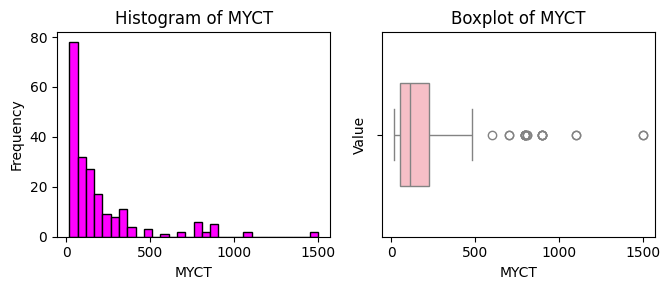

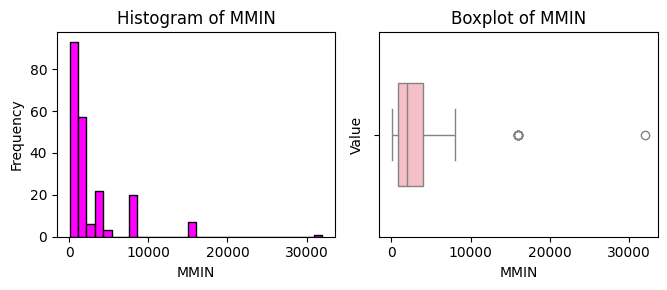

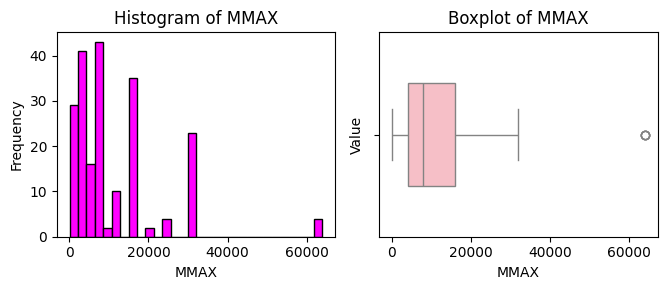

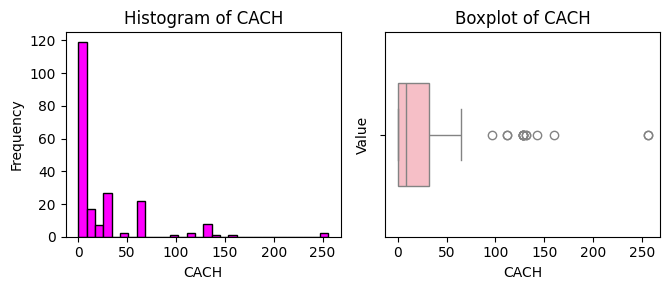

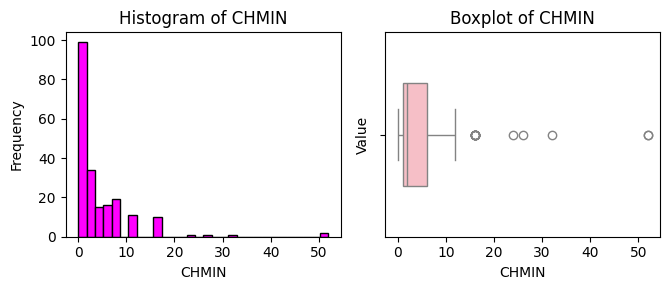

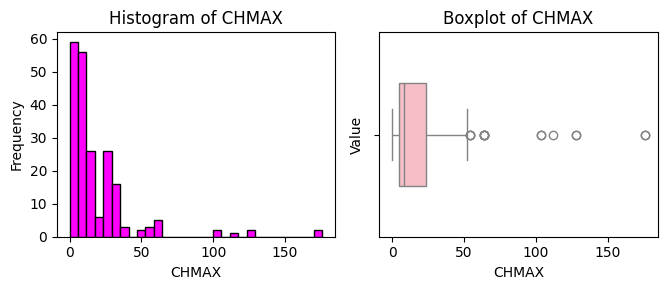

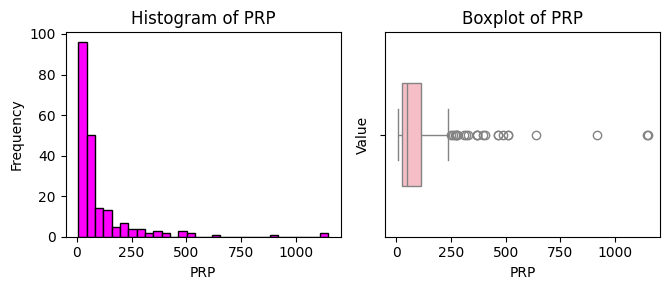

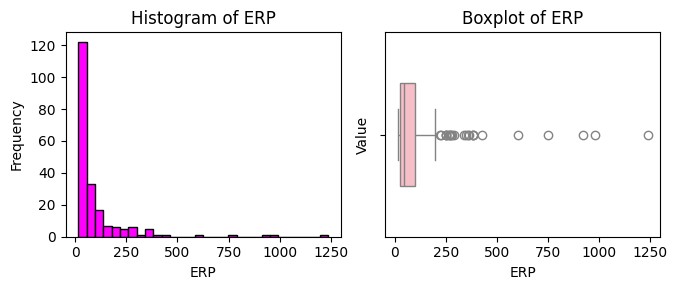

In [30]:
#Explore each columns : Univariate analysis
#Histogram for Visualize the distribution of column values, Boxplot for see percentiles and detect outliers
num_cols = computer_hardware_df.select_dtypes(include=np.number).columns
numerical_data = computer_hardware_df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    computer_hardware_df[col].plot.hist(bins=30, color='magenta', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=computer_hardware_df[col],color='lightpink', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')


    plt.tight_layout()
    plt.show()

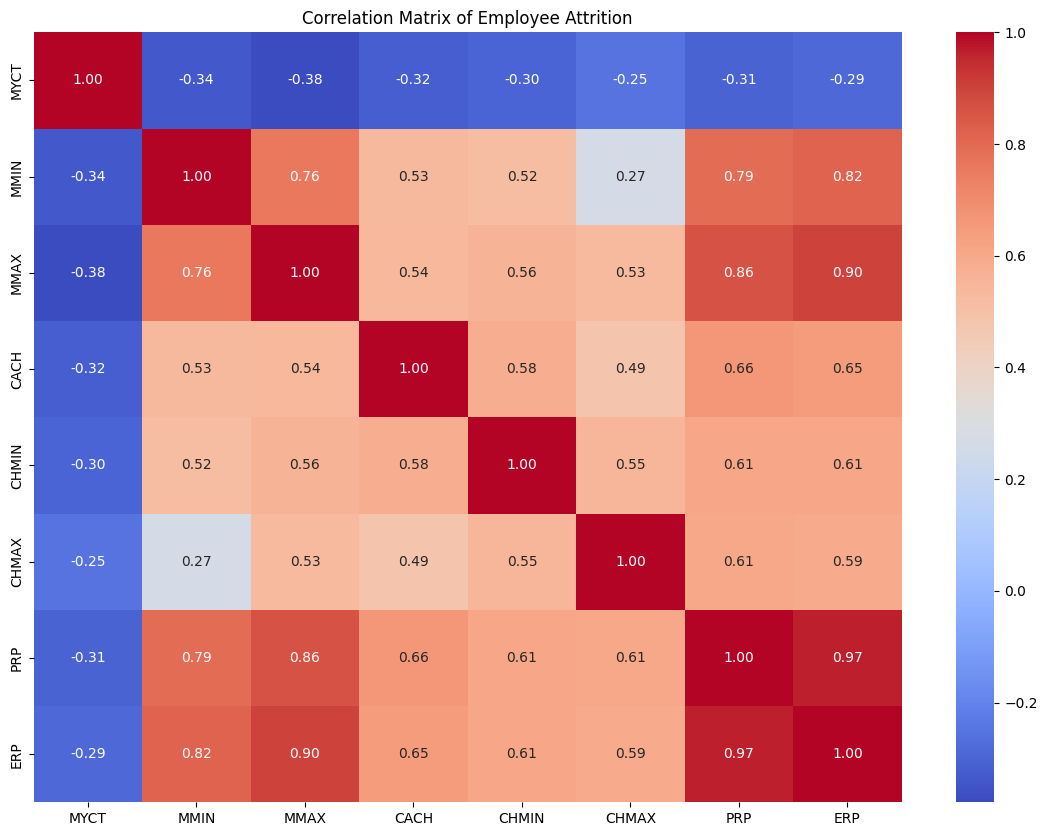

In [35]:
#explore correlation matrix of each numerical values
# Select only numerical features for correlation analysis
numerical_df = computer_hardware_df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Employee Attrition')
plt.show()

In [36]:
# Print the correlation matrix
print("Correlation Matrix:\n")
print(correlation_matrix)

Correlation Matrix:

           MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP  \
MYCT   1.000000 -0.335642 -0.378561 -0.321000 -0.301090 -0.250502 -0.307099   
MMIN  -0.335642  1.000000  0.758157  0.534729  0.517189  0.266907  0.794931   
MMAX  -0.378561  0.758157  1.000000  0.537990  0.560513  0.527246  0.863004   
CACH  -0.321000  0.534729  0.537990  1.000000  0.582245  0.487846  0.662641   
CHMIN -0.301090  0.517189  0.560513  0.582245  1.000000  0.548281  0.608903   
CHMAX -0.250502  0.266907  0.527246  0.487846  0.548281  1.000000  0.605209   
PRP   -0.307099  0.794931  0.863004  0.662641  0.608903  0.605209  1.000000   
ERP   -0.288396  0.819292  0.901202  0.648620  0.610580  0.592156  0.966472   

            ERP  
MYCT  -0.288396  
MMIN   0.819292  
MMAX   0.901202  
CACH   0.648620  
CHMIN  0.610580  
CHMAX  0.592156  
PRP    0.966472  
ERP    1.000000  


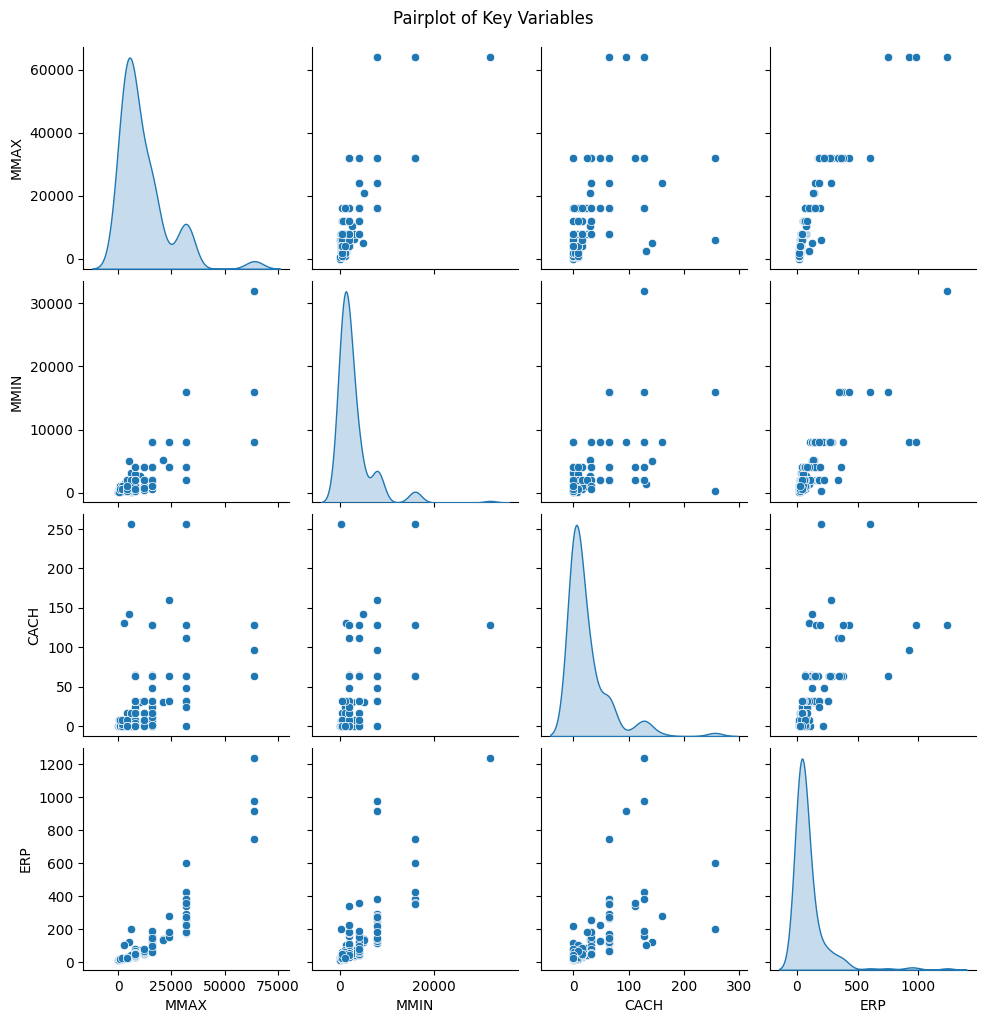

In [38]:
# Define key variables for pairplot
key_variables = ['MMAX', 'MMIN', 'CACH', 'ERP'] # Changed to a list of column names

# Create pairplot
sns.pairplot(numerical_df[key_variables], diag_kind='kde', kind='scatter', height=2.5) # Using the list to select columns
plt.suptitle('Pairplot of Key Variables', y=1.02)  # Add title
plt.show()


Insights for the matrix you provided:
PRP and ERP: High correlation (0.966)
 — they might represent similar or related metrics, which could indicate redundancy.
MMAX and ERP: Very strong correlation (0.901)
 — MMAX is a potential key predictor for ERP.
CACH and PRP: Moderate correlation (0.662)
 — CACH could be relevant but less dominant than others like MMAX.

 Model Development
If your goal is to predict a target variable (e.g., ERP or PRP), use the correlation matrix to identify key features. For instance:
Strong correlations with ERP: Use MMAX, MMIN, CACH, and CHMIN as starting features for a regression or classification model.
Drop features with weak correlations to reduce noise in the model

Feature Selection:
For our linear regression analysis, we select several relevant features from the dataset, including machine cycle time (MYCT), minimum and maximum main memory (MMIN and MMAX), cache memory (CACH), and channel specifications (CHMIN and CHMAX). These features are chosen based on their potential influence on hardware performance.

We then split the dataset into the features (input) and target (output).



In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming computer_hardware_df is already defined

# Ensure only numeric columns are used for predictors
X = computer_hardware_df.drop(columns=['PRP'])  # Drop target column
X = X.select_dtypes(include=['number'])  # Keep only numeric features
y = computer_hardware_df['PRP']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to preserve 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components selected
print(f"Number of principal components selected: {pca.n_components_}")

# Train a Linear Regression model on PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test_pca)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Number of principal components selected: 5
Mean Squared Error: 9368.10557070327
R-squared Score: 0.8363958320923413


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming computer_hardware_df is already defined

# Ensure only numeric columns are used for predictors
X = computer_hardware_df.drop(columns=['PRP'])  # Drop target column
X = X.select_dtypes(include=['number'])  # Keep only numeric features
y = computer_hardware_df['PRP']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to preserve 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components selected
print(f"Number of principal components selected: {pca.n_components_}")

# Train a Linear Regression model on PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Display the first few rows of actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted values (first 5 rows):")
print(comparison_df.head())

# Extract the coefficients and intercept to display the final equation
coefficients = model.coef_
intercept = model.intercept_

# Form the final equation
equation = "PRP = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients):
    equation += " + ({:.2f} * PC{})".format(coef, i+1)  # PC1, PC2, etc. for Principal Components

print("\nFinal Linear Regression Equation:")
print(equation)


Number of principal components selected: 5
Mean Squared Error: 9368.10557070327
R-squared Score: 0.8363958320923413

Actual vs Predicted values (first 5 rows):
     Actual   Predicted
30      274  147.078876
171      30   18.732161
84       22   26.445978
198     915  554.936500
60       16   30.793796

Final Linear Regression Equation:
PRP = 87.45 + (47.92 * PC1) + (-15.11 * PC2) + (16.40 * PC3) + (6.27 * PC4) + (3.37 * PC5)


ndicating that about 83.6% of the variance in the target variable (PRP) is explained by the model. The Mean Squared Error (MSE) of 9368.11  indicates the magnitude of error in the predictions, and while it's a reasonable value, there may still be room for improvement.



In regression tasks, R-squared (R²) is typically the most relevant metric for evaluating model accuracy, as it explains how much variance in the target variable (PRP) is explained by the model. R-squared is a good measure because it tells us the proportion of the variance in the dependent variable that is predictable from the independent variables (in this case, the principal components).



In [42]:
#try random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest R-squared: 0.7099914756291661
Random Forest MSE: 16606.120170748174


In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming computer_hardware_df is already defined
X = computer_hardware_df.drop(columns=['PRP'])  # Drop target column
X = X.select_dtypes(include=['number'])  # Keep only numeric features
y = computer_hardware_df['PRP']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)

     MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  ERP
128    50  2000  16000    24      1      6   82
79    180   768  12000     6      1     31   53
204   124  1000   8000     0      1      8   37
178   160  1000   4000     8      1     14   29
31     25  1310   2620   131     12     24  102
..    ...   ...    ...   ...    ...    ...  ...
106   400  4000   8000     0      1      1   45
14    350    64     64     0      1      4   15
92    140  2000   4000     8      1     20   32
179   160  1000   8000    16      1     14   43
102  1100   512   1500     0      1      1   18

[146 rows x 7 columns]


In [49]:


# Define the models
ridge_model = Ridge()
lasso_model = Lasso()
linear_model = LinearRegression()

# Create individual pipelines for each model
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', ridge_model)
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', lasso_model)
])

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', linear_model)
])

# Train the models and make predictions

# Ridge
ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso
lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Linear Regression
linear_pipeline.fit(X_train, y_train)
linear_pred = linear_pipeline.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Display Results
print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared: {ridge_r2}\n")

print("Lasso Regression Results:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R-squared: {lasso_r2}\n")

print("Linear Regression Results:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}\n")


Ridge Regression Results:
Mean Squared Error: 4965.754500443123
R-squared: 0.9132782901572575

Lasso Regression Results:
Mean Squared Error: 4713.150183811075
R-squared: 0.9176897604081597

Linear Regression Results:
Mean Squared Error: 4424.69288655083
R-squared: 0.9227273654755855



Linear Regression perform best among this 3 models and
Linear Regression has the lowest Mean Squared Error (MSE) and the highest R-squared, meaning it explains more variance and has better prediction accuracy than both Ridge and Lasso models.

Linear Regression Model Evaluation Results:
Mean Squared Error (MSE): 4424.692886550784
Root Mean Squared Error (RMSE): 66.51836503215323
Mean Absolute Error (MAE): 36.61927988113117
R-squared: 0.9227273654755863
Mean Squared Log Error (MSLE): 0.16776663851650955

Cross-validation Results (5-fold):
Average MSE from Cross-validation: 3377.7668532915923
Average R-squared from Cross-validation: 0.8333737813606049



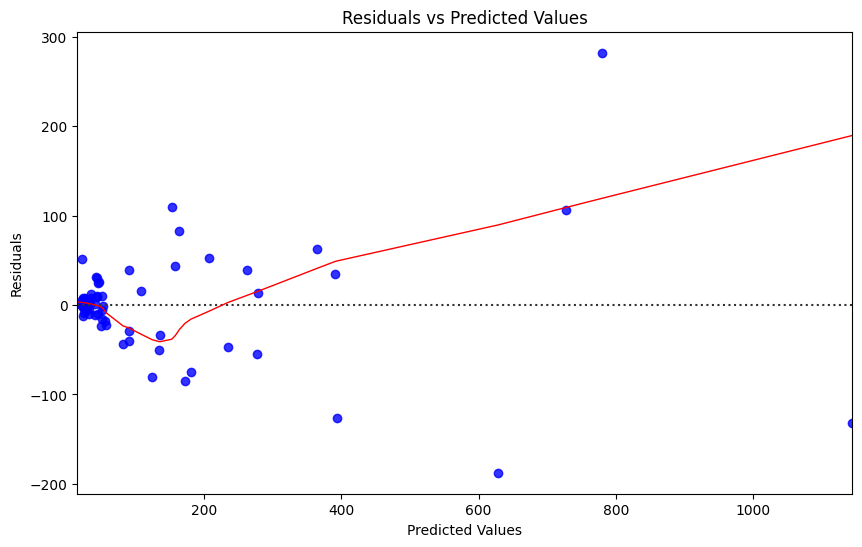

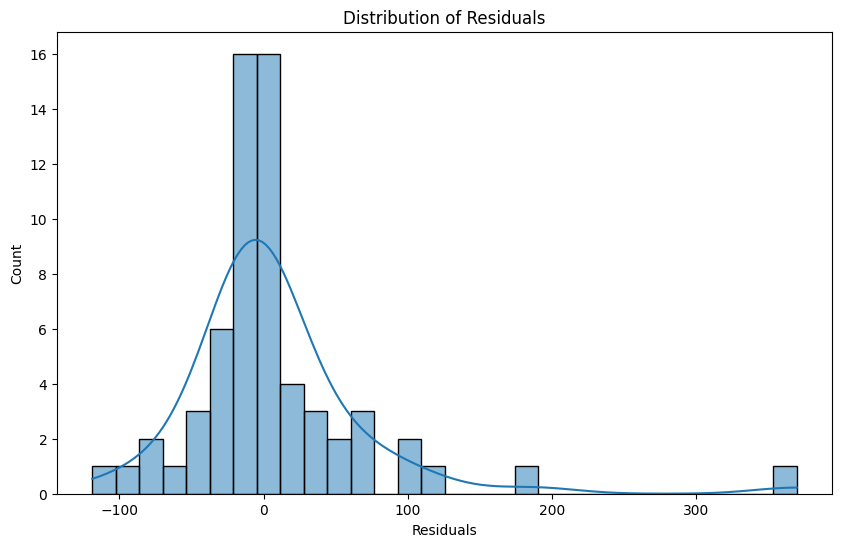

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# Create a Linear Regression model and train it
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate performance using various metrics

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Squared Log Error (MSLE) (optional, if your data has exponential growth)
msle = mean_squared_log_error(y_test, y_pred)

# Cross-validation scores
cross_val_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')  # Using MSE for CV
cross_val_r2 = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

# Print Evaluation Results
print("Linear Regression Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"Mean Squared Log Error (MSLE): {msle}\n")

# Cross-validation results
print("Cross-validation Results (5-fold):")
print(f"Average MSE from Cross-validation: {-cross_val_scores.mean()}")
print(f"Average R-squared from Cross-validation: {cross_val_r2.mean()}\n")

# Residual analysis (plotting residuals)
residuals = y_test - y_pred

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 1})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()



Histogram of Residuals: This plot shows the distribution of residuals. If the model is well-fitted, residuals should be normally distributed (centered around 0)


Residuals vs Predicted Plot: A plot of residuals against predicted values. If the residuals are randomly scattered around zero, it indicates that the model fits the data well. Any patterns suggest potential issues.